In [1]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd


<Axes: >

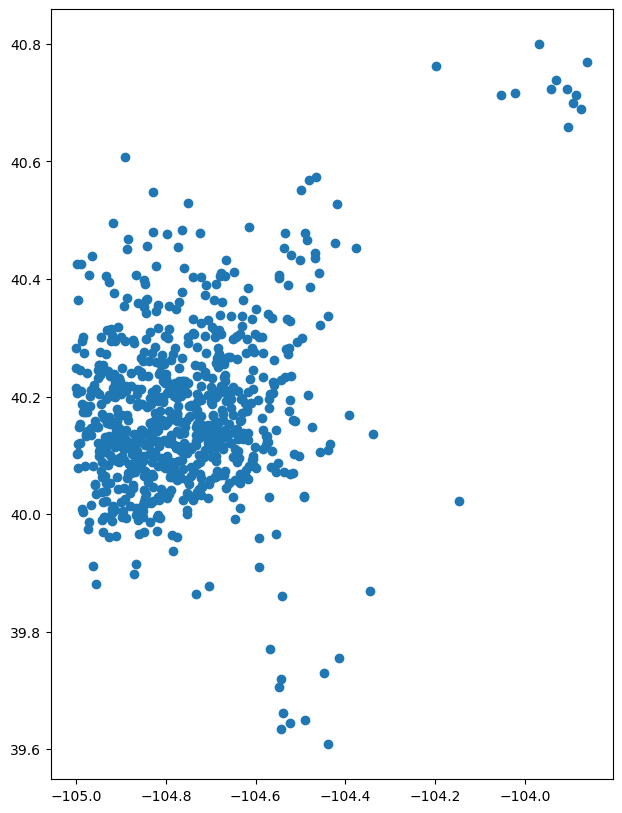

In [2]:
aoi = (-105, 39.5, -103.7, 40.8) # Area of Intrest (bounding box)
raptors = gpd.read_file("geopandas/data/Raptor_Nests.shp", bbox = aoi)
raptors.plot(figsize=(10,10))

<Axes: >

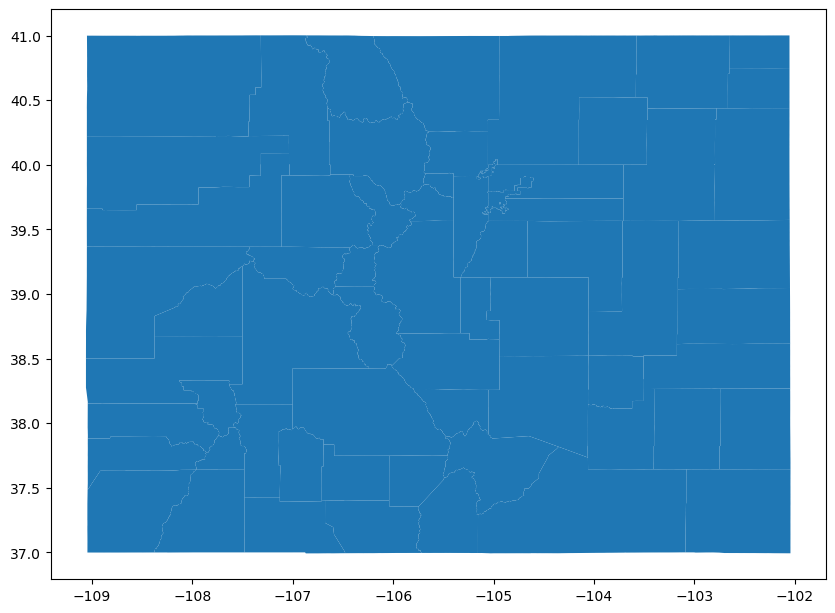

In [3]:
countries = gpd.read_file("geopandas/data/colorado_counties.shp")
countries.plot(figsize=(10, 10))

<Axes: >

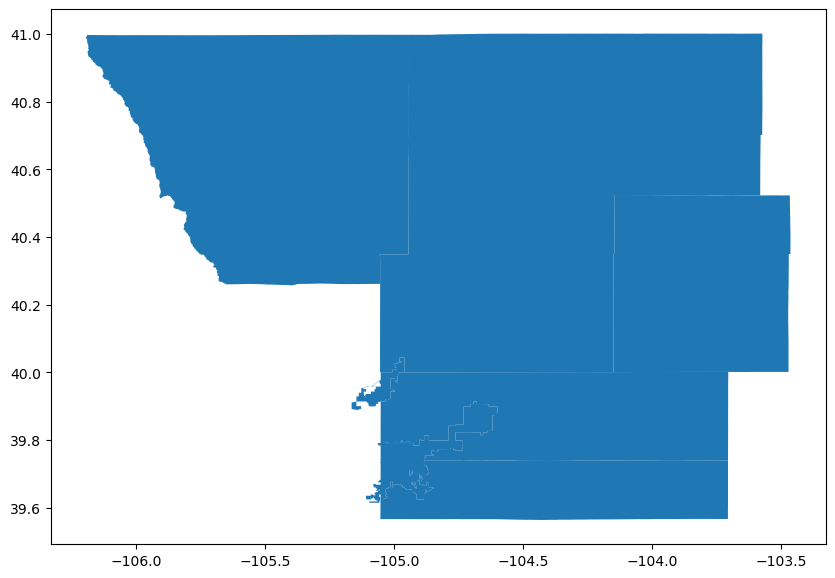

In [4]:
countries_aoi = gpd.read_file("geopandas/data/colorado_counties.shp", bbox = tuple(raptors.total_bounds))
countries_aoi.plot(figsize=(10, 10))

In [5]:
raptors.head()

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
3,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
4,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712)


<Axes: >

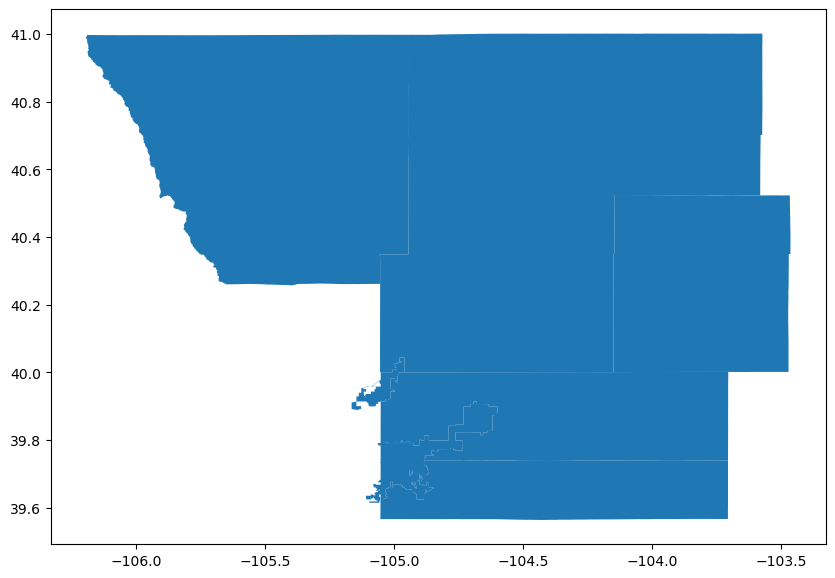

In [6]:
countries_aoi = gpd.read_file("geopandas/data/colorado_counties.shp", bbox = raptors)
countries_aoi.plot(figsize=(10, 10))

In [7]:
countries_aoi.head()

,OBJECTID,COUNTYFP,Shape_Leng,Shape_Area,low,lowmod,LMMI,lowmoduniv,lowmod_pct,NAMELSAD10,geometry
0,1,001,4.321021,0.322758,132545.0,231255.0,334950.0,467200.0,0.494981,Adams County,"POLYGON ((-103.86177 40.00123, -103.86147 40.0..."
1,3,005,3.713979,0.218916,145159.0,250415.0,371560.0,603745.0,0.414769,Arapahoe County,"MULTIPOLYGON (((-104.90290 39.62418, -104.9040..."
2,8,014,1.174635,0.009158,9045.0,17315.0,29050.0,60355.0,0.286886,Broomfield County,"MULTIPOLYGON (((-105.09996 39.95799, -105.0999..."
3,17,031,2.744229,0.042103,214070.0,330205.0,441065.0,634420.0,0.520483,Denver County,"MULTIPOLYGON (((-104.93167 39.69917, -104.9316..."
4,36,069,3.899824,0.726530,83810.0,134340.0,194105.0,309125.0,0.434581,Larimer County,"POLYGON ((-105.23149 40.99842, -105.22664 40.9..."


In [8]:
broomfield = countries_aoi[countries_aoi.NAMELSAD10 == "Broomfield County"]
#print(broomfield.head())

<Axes: >

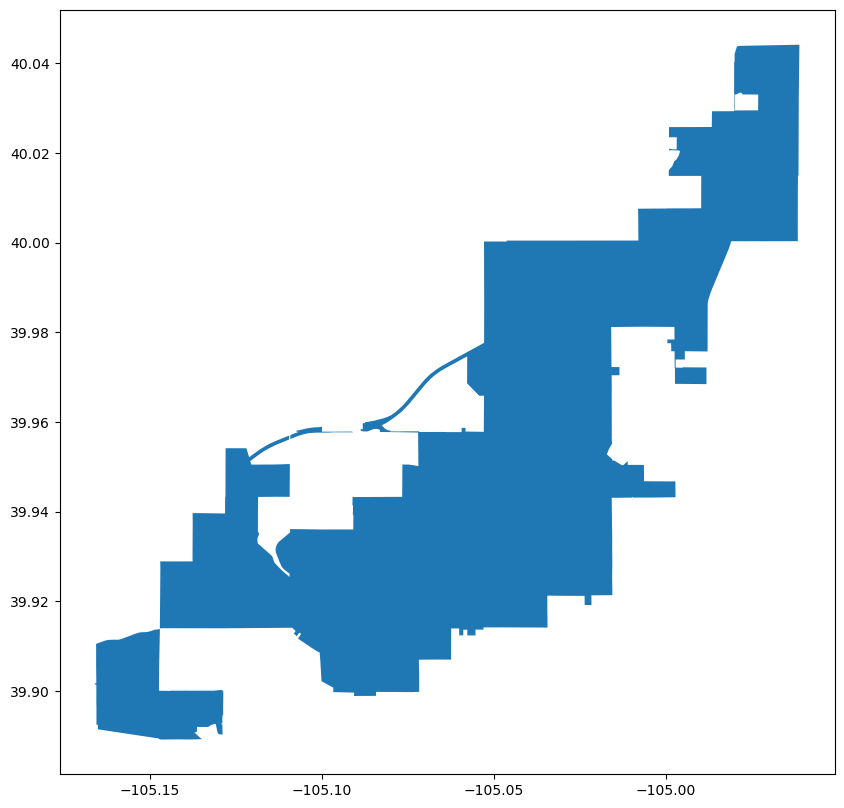

In [9]:
broomfield.plot(figsize=(10,10))

<Axes: >

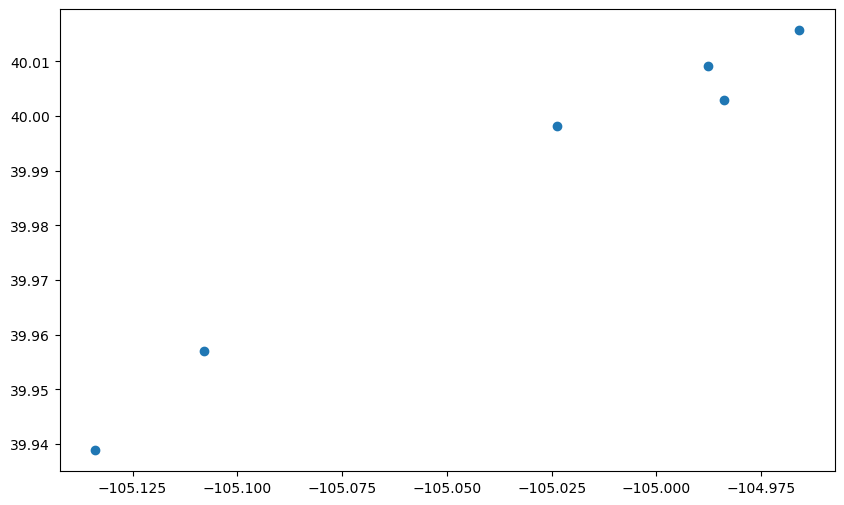

In [10]:
broomfield_nests = gpd.read_file("geopandas/data/Raptor_Nests.shp", mask = broomfield)
broomfield_nests.plot(figsize=(10,10))

# Reading Tabular Data

#csv, excel,sql, etc


In [12]:
BAEA_source = pd.read_csv("geopandas/data/BAEA_sources.csv")
BAEA_source.head()

,code,source
0,1,Colorado Fish Wildlife and Parks
1,2,US Fish and Wildlife Service
2,3,ABC Environmental
3,4,123 Environmental


In [13]:
BAEA_survey = pd.read_csv("geopandas/data/BAEA_surveys.csv")
BAEA_survey.head()

,id,nest,surveyor,date,result
0,6.0,52,Dan Smith,2015-07-11,ACTIVE NEST
1,8.0,54,Mike Miller,2015-05-08,ACTIVE NEST
2,9.0,25,Mike Miller,2015-05-13,INACTIVE NEST
3,10.0,65,Mike Miller,2015-08-21,INACTIVE NEST
4,11.0,33,Mike Miller,2015-06-26,ACTIVE NEST


In [14]:
BAEA_survey.sort_values("nest")

,id,nest,surveyor,date,result
1668,1673.0,1,Dan Smith,2015-07-19,INACTIVE NEST
859,864.0,1,Mike Miller,2015-08-28,INACTIVE NEST
513,518.0,1,Dan Smith,2015-07-16,ACTIVE NEST
1479,1484.0,1,Mike Miller,2015-07-03,INACTIVE NEST
1508,1513.0,1,Mike Miller,2015-04-07,FLEDGED NEST
...,...,...,...,...,...
886,891.0,76,Dan Smith,2015-08-06,FLEDGED NEST
1557,1562.0,76,Mike Miller,2015-05-08,INACTIVE NEST
1829,1834.0,76,Mike Miller,2015-08-06,INACTIVE NEST
898,903.0,76,Mike Miller,2015-07-04,INACTIVE NEST


In [19]:
# Selecting a subset 
BAEA_survey_14= BAEA_survey[BAEA_survey["nest"] == 14]
print(BAEA_survey_14.sort_values("date", ascending = True))

          id  nest      surveyor        date         result
1028  1033.0    14   Mike Miller  2015-03-17  INACTIVE NEST
798    803.0    14   Mike Miller  2015-03-18   FLEDGED NEST
215    220.0    14   Mike Miller  2015-03-24    ACTIVE NEST
52      59.0    14     Dan Smith  2015-03-25  INACTIVE NEST
414    419.0    14     Dan Smith  2015-04-05    ACTIVE NEST
986    991.0    14   Mike Miller  2015-04-16    ACTIVE NEST
1865  1870.0    14   Mike Miller  2015-04-24  INACTIVE NEST
1859  1864.0    14     Dan Smith  2015-05-02  INACTIVE NEST
1594  1599.0    14   Mike Miller  2015-05-08    ACTIVE NEST
1817  1822.0    14   Mike Miller  2015-05-22    ACTIVE NEST
1556  1561.0    14     Dan Smith  2015-06-04  INACTIVE NEST
1344  1349.0    14  George Baker  2015-06-05  INACTIVE NEST
1655  1660.0    14   Mike Miller  2015-06-06  INACTIVE NEST
427    432.0    14   Mike Miller  2015-06-08  INACTIVE NEST
626    631.0    14   Mike Miller  2015-06-12  INACTIVE NEST
779    784.0    14     Dan Smith  2015-0

In [20]:
BAEA_survey_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 52 to 1915
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20 non-null     float64
 1   nest      20 non-null     int64  
 2   surveyor  20 non-null     object 
 3   date      20 non-null     object 
 4   result    20 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 960.0+ bytes


In [21]:
BAEA_survey['date'] = pd.to_datetime(BAEA_survey['date'])
BAEA_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1996 non-null   float64       
 1   nest      1997 non-null   int64         
 2   surveyor  1997 non-null   object        
 3   date      1997 non-null   datetime64[ns]
 4   result    1997 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 78.1+ KB


In [25]:
excel_file = pd.ExcelFile("geopandas/data/wildlife_sightings.xls")

# Get the names of all sheets in the Excel file
sheet_names = excel_file.sheet_names

print(sheet_names)

['albatross']


In [27]:
albatross_spatial = pd.read_excel("geopandas/data/wildlife_sightings.xls", sheet_name = "albatross")
albatross_spatial 

,id,latitude,longitude
0,1,39.527924,-105.575747
1,2,39.574666,-105.536514
2,3,39.217363,-105.374948
3,4,39.755457,-105.091596
4,5,39.197807,-105.649858
5,6,39.642896,-105.326078
6,7,39.032123,-105.999383
7,8,39.119083,-105.392691
8,9,39.874840,-105.207063
9,10,39.400908,-105.442039


<Axes: >

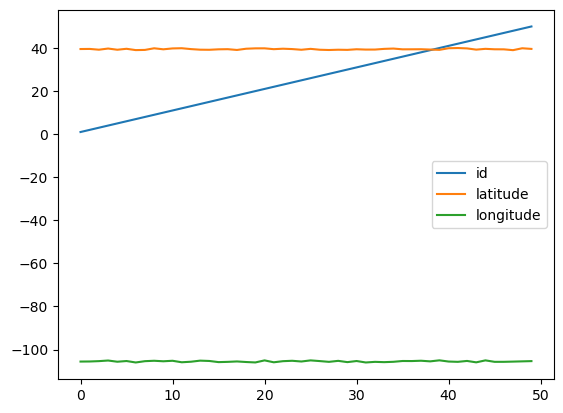

In [28]:
albatross_spatial.plot()

# Converting Non-spatial to Spatial 

<Axes: >

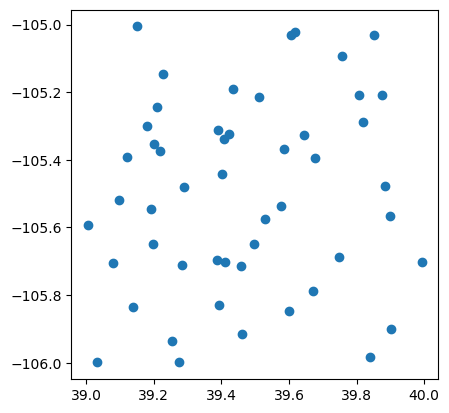

In [29]:
#  convert a pandas data frame that has columns for longtude nad latitude into spatial GeoPandas dataframe by calling GeoPandas points_from_xy method

albatross_spatial_cood = gpd.GeoDataFrame(
    albatross_spatial, geometry = gpd.points_from_xy(
                                            albatross_spatial["latitude"],
                                            albatross_spatial["longitude"]
                                              )
)

albatross_spatial_cood.plot()

# Reading Tabular data from HTML pages

In [30]:
!pip install lxml html5lib BeautifulSoup4

     ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.8 MB 660.6 kB/s eta 0:00:06
     -- ------------------------------------- 0.3/3.8 MB 3.2 MB/s eta 0:00:02
     -------- ------------------------------- 0.8/3.8 MB 6.1 MB/s eta 0:00:01
     -------------- ------------------------- 1.4/3.8 MB 8.2 MB/s eta 0:00:01
     ----------------------- ---------------- 2.2/3.8 MB 9.9 MB/s eta 0:00:01
     -------------------------------- ------- 3.1/3.8 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


In [32]:
import ssl
ssl._create_default_https_context = ssl._create_default_https_context

In [44]:
gpd_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")
gpd_list[1]

Country/Territory UN Region IMF[5][6]       World Bank[7]         
              Country/Territory UN Region  Estimate  Year      Estimate  Year   
0                     Ireland *    Europe    145196  2023        106352  2021  \
1                  Luxembourg *    Europe    142490  2023        134545  2021   
2               Liechtenstein *    Europe         —     —             —     —   
3                   Singapore *      Asia    133895  2023        116487  2021   
4                       Qatar *      Asia    124834  2023        102018  2021   
..                          ...       ...       ...   ...           ...   ...   
225                  DR Congo *    Africa      1474  2023          1180  2021   
226                   Somalia *    Africa      1374  2023          1249  2021   
227  Central African Republic *    Africa      1127  2023           920  2021   
228                   Burundi *    Africa       891  2023           775  2021   
229               South Sudan *    Africa       516  2023          1182  2015   

    CIA[8][9][10]        
         Estimate  Year  
0          102500  2021  
1          115700  2021  
2          139100  2009  
3          106000  2021  
4           92200  2021  
..            ...   ...  
225          1100  2021  
226          1100  2021  
227           800  2021  
228           700  2021  
229          1600  2017  

[230 rows x 8 columns]

# Writing a GeoDataFrame to dick file or database

In [45]:
buowl_ll = gpd.read_file("geopandas/data/BUOWL_Habitat.shp")

buowl_ll_utm = buowl_ll.to_crs(epsg = 26913)

In [46]:
buowl_ll_utm.crs

<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
buowl_ll.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
buowl_ll_utm.to_file("geopandas/data/BUOWL_utm.shp")

#save it as a subset file
buowl_ll_utm[buowl_ll_utm["hist_occup"] == 'Yes'].to_file("geopandas/data/BUOWL_utm_subset.shp") 

#### save as geopackage layer

In [53]:
import fiona 
fiona.listlayers("geopandas/data/DJBasin.gpkg")


['LinearProjects',
 'BUOWL_Habitat',
 'BAEA_Nests',
 'Raptor_nests',
 'GBH_rookeries',
 'new_poly',
 'buowl_ho',
 'buowl_ho2']

In [56]:
buowl_ll[buowl_ll["hist_occup"] == 'yes'].to_file("geopandas/data/wildlife_buowl_ho.geojson", layer = "buowl_ho2", driver = "GPKG")

#convert to string

c:\Users\nakhu\anaconda3\envs\GeoAI\lib\site-packages\geopandas\io\file.py:539: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
